# Data Analysis for Python

Python is a powerful data analysis platform, and is a common programming language in scientific computing applications. 

In [2]:
# Some data, in a list
my_data = [12, 5, 17, 8, 9, 11, 21]

# Function for calulating the mean of some data
def mean(data):

    # Initialize sum to zero
    sum_x = 0.0

    # Loop over data
    for x in data:

        # Add to sum
        sum_x += x 
    
    # Divide by number of elements in list, and return
    return sum_x / len(data)

Python offers a number of advantages to scientists, both for experienced and novice programmers alike:

 * Powerful and easy to use
 * Interactive
 * Extensible
 * Free and open


In addition, the rich third-party library ecosystem (the "Scientific Stack") for Python extends the language to perform a wide variety of general and specific scientific computing tasks.

* ***NumPy***: Numerical Python is a set of extensions that provides the ability to specify and manipulate array data structures.
* ***SciPy***: An open source library of scientific tools for Python, SciPy supplements the NumPy module. SciPy gathers a variety of high level science and engineering modules together as a single package. 
* ***Matplotlib***: Matplotlib is a python 2D plotting library which produces publication-quality figures in a variety of formats and interactive environments across platforms. 
* ***pandas***: A module that provides high-performance, easy-to-use data structures and data analysis tools. 
* ***IPython/Jupyter***: An enhanced Python shell, designed to increase the efficiency and usability of coding, testing and debugging Python. 
* ***scikit-learn***: Simple and efficient tools for machine learning and data analysis.
* ***PyMC***: Probabilistic programming and Bayesian statistics.

We will briefly introduce you to several of these packages, and demonstrate their capabilities.

## NumPy

The most fundamental third-party package for scientific computing in Python is NumPy, which provides multidimensional array data types, along with associated functions and methods to manipulate them. Other third-party packages, including Pandas, use NumPy arrays as backends for more specialized data structures.

In [3]:
import numpy as np

While Python comes with several container types (`list`, `tuple`, `dict`), NumPy's arrays are implemented closer to the hardware, and are therefore more efficient than the built-in types. This is particularly true for large data, for which NumPy scales much better than Python's built-in data structures.

In [4]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

An important feature of the `array` is that it supports vectorized operations, which is more efficient than manually programming control flow operations.

In [5]:
(x + 3)**2

array([  9,  16,  25,  36,  49,  64,  81, 100, 121, 144])

NumPy arrays also retain a suite of associated functions and methods that allow for efficient array-oriented computing.

In [6]:
y = np.random.randn(4,10)
y

array([[-0.91205516, -1.53647822,  0.37116299, -1.67188934, -1.43725832,
        -1.31330274,  0.72054823,  0.11220331,  0.66030615,  0.60844464],
       [-0.72896952,  1.33437993, -0.30591599,  1.1575249 ,  1.38408667,
         0.48250378, -1.36757477,  0.45115384, -1.28215286,  0.97318934],
       [-0.92165289, -0.17658955, -1.20485216,  0.71055455, -0.04411767,
         0.50045014, -1.55896232, -0.15654802, -0.08348664, -0.88237422],
       [ 2.03361072,  1.78484915,  1.31037188, -2.50726816, -1.28783294,
         0.13377647, -0.29225824, -0.38827894,  0.24159132,  0.79484918]])

In [7]:
y.dot(x)

array([ -2.25820376,   5.5980976 , -17.18772143,  -2.98378988])

## pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

In [8]:
import pandas as pd

The remainder of the tutorial will involve the analysis of some climate data, which we will download from the NOAA website:

In [9]:
data_url = 'https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv'

The structure of the data is as follows:

```
Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002
```

The data are **global surface temperature anomalies**, which are differences between some earth surface temperature measurement and a long-term average. A positive value indicates a warmer observed temperature, while negative values are cooler. Relative temperatures are better for describing climate variability over large areas and long time scales than absolute temperatures are.

This data file contains monthly average land temperature anomalies from 1880 to 2015, which we will import and analyze.

How do we get this dataset into a NumPy or pandas data structure? 

pandas makes it really easy to import data in various formats with its suite of import functions:

In [10]:
[f for f in dir(pd) if f.startswith('read_')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Our dataset is comma-delimited, so we will use `read_csv`. Happily, we can import the data directly from its URL, rather than having to save it to a local drive.

Notice, however, that the data includes several *header rows* that contain metadata, rather than data itself. Each `read_` function includes several optional arguments that help us deal with common idiosyncrasies of various data files.

In [11]:
raw_data = pd.read_csv(data_url, skiprows=3)
raw_data.head()

,Year,Value
0,188001,-0.1419
1,188002,-0.5534
2,188003,-0.7064
3,188004,-0.2865
4,188005,-0.1968


`read_csv` returns a `DataFrame`, a tabular data structure provided by pandas. 

In [12]:
type(raw_data)

pandas.core.frame.DataFrame

A `DataFrame` is endowed with several attributes and methods useful for exploring the data.

In [13]:
raw_data.shape

(1632, 2)

In [14]:
raw_data.describe()

,Year,Value
count,1632.00000,1632.000000
mean,194756.50000,0.043429
std,3927.08055,0.540733
min,188001.00000,-2.014000
25%,191378.75000,-0.318600
50%,194756.50000,-0.028000
75%,198134.25000,0.332800
max,201512.00000,1.934300


A `DataFrame` is comprised of two major components; the first are the data themselves, which can be extracted via the `values` attribute:

In [15]:
raw_data.values

array([[  1.88001000e+05,  -1.41900000e-01],
       [  1.88002000e+05,  -5.53400000e-01],
       [  1.88003000e+05,  -7.06400000e-01],
       ..., 
       [  2.01510000e+05,   1.35630000e+00],
       [  2.01511000e+05,   1.30570000e+00],
       [  2.01512000e+05,   1.90350000e+00]])

The second is a set of **indices**, which are essentially labels for the rows and columns of the `DataFrame`.

In [16]:
raw_data.index

RangeIndex(start=0, stop=1632, step=1)

In [17]:
raw_data.columns

Index(['Year', 'Value'], dtype='object')

But, an index is more than just a set of labels. Importantly, it ensures **data alignment** when data are added or data structures are combined.

Let's make up some fake data, this time in the form of a `Series`, an indexed, array-like pandas data structure.

In [18]:
more_data = pd.Series(np.random.random(10), np.arange(6,16), name='more_data')
more_data

6     0.996322
7     0.945928
8     0.191197
9     0.514569
10    0.654671
11    0.047591
12    0.600229
13    0.755441
14    0.432055
15    0.517081
Name: more_data, dtype: float64

We have given the `Series` an arbitrary sequence of integers. Let's now add it to our `raw_data` and see what happens.

In [19]:
raw_data.join(more_data)

,Year,Value,more_data
0,188001,-0.1419,NaN
1,188002,-0.5534,NaN
2,188003,-0.7064,NaN
3,188004,-0.2865,NaN
4,188005,-0.1968,NaN
5,188006,-0.2968,NaN
6,188007,-0.3267,0.996322
7,188008,-0.3069,0.945928
8,188009,-0.3664,0.191197
9,188010,-0.6100,0.514569


Here, the `join` method concatenated the two data structures, using the index values as **keys** in the operation. Values in one data structure but not in the other are represented as missing values (`NaN`). This alignment behavior is critical when operating on larger, more complex datasets.

We can actually specify a more appropriate index for our data. The `Year` field here is a unique index to the corresponding analysis values.

`set_index` allows us to convert whichever column (or external array) we choose into the row index.

In [20]:
temp_anomaly = raw_data.set_index('Year')

temp_anomaly.head()

,Value
Year,
188001,-0.1419
188002,-0.5534
188003,-0.7064
188004,-0.2865
188005,-0.1968


If the index elements are meaningful to us, we can use them to extract values of interest, using the `loc` accessor or a slice index, just as we have seen with NumPy arrays.

In [21]:
temp_anomaly.loc[201506]

Value    1.2848
Name: 201506, dtype: float64

In [22]:
temp_anomaly.loc[194000:194200]

,Value
Year,
194001,-0.5710
194002,0.0699
194003,0.1263
194004,0.1850
194005,-0.1539
194006,0.1217
194007,0.1928
194008,-0.0261
194009,0.2027


In [23]:
temp_anomaly[:2]

,Value
Year,
188001,-0.1419
188002,-0.5534


## Plotting in Python

Today, Python has a rich ecosystem of data visualization libraries:

* [matplotlib](http://matplotlib.org/)
  * pandas
  * [seaborn](http://stanford.edu/~mwaskom/software/seaborn/)
* [mpld3](http://mpld3.github.io/)
  * "Bringing matplotlib to the browser"
* [d3py](https://github.com/mikedewar/d3py)
  * "a plotting library for python based on d3."
* [mayavi](http://docs.enthought.com/mayavi/mayavi/)
  * "seeks to provide easy and interactive visualization of 3D data."
* [ggplot](https://github.com/yhat/ggplot)
  * "Yes, it's another port of ggplot2."
* [bokeh](http://bokeh.pydata.org/en/latest/)
  * "Bokeh is a Python interactive visualization library that targets modern web browsers for presentation."
* mpl_toolkits
  * [basemap](http://matplotlib.org/basemap/)
  * [mplot3d](http://matplotlib.org/1.4.3/mpl_toolkits/mplot3d/index.html) 
  
Matplotlib is the *de facto* standard plotting library for Python. It is not necessarily the best or the easiest, but many packages use it as a toolkit to build higher-level plotting libraries, so it is useful to be familiar with it. We will mainly use pandas' own plotting methods (which are also built upon Matplotlib).

Jupyter supports the display of plots in the notebook interface, but this behavior has to be manually enabled:

In [24]:
%matplotlib inline
import matplotlib.pylab as plt

Let's see what happens now if we call the `plot` method on our `temp_anomaly` dataset:

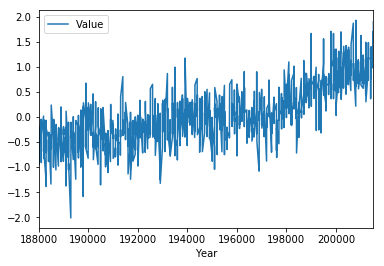

In [25]:
temp_anomaly.plot()

Thus, pandas provides *high-level* plotting capabilities: output is near-publication quality with labels, legends and readable axis markers.

If you zoom in on a subset of the time series, you will notice the index does not consist of consecutive integers:

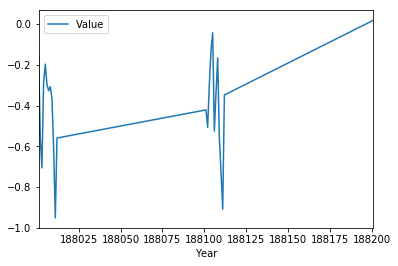

In [26]:
temp_anomaly[:25].plot()

The index is not simply a sequence of integers, but rather, a concatenation of the year and month. As the result, the plot does not represent the time series adequately.

In [27]:
temp_anomaly.index[:25]

Int64Index([188001, 188002, 188003, 188004, 188005, 188006, 188007, 188008,
            188009, 188010, 188011, 188012, 188101, 188102, 188103, 188104,
            188105, 188106, 188107, 188108, 188109, 188110, 188111, 188112,
            188201],
           dtype='int64', name='Year')

One way to fix this is to convert the index into dates. We can do this by employing a Python **list comprehension**:

In [28]:
from datetime import date
pd.to_datetime(['-'.join([str(t)[:4], str(t)[4:]]) for t in temp_anomaly.index])

DatetimeIndex(['1880-01-01', '1880-02-01', '1880-03-01', '1880-04-01',
               '1880-05-01', '1880-06-01', '1880-07-01', '1880-08-01',
               '1880-09-01', '1880-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=1632, freq=None)

Perhaps an easier approach is to use the `date_range` function, which generates sequences of dates and times at whichever length and frequency required.

So, a monthly sequence of the same length of our DataFrame is created by:

In [29]:
month_range = pd.date_range('1880-01-01', periods=temp_anomaly.shape[0], freq='M')
month_range

DatetimeIndex(['1880-01-31', '1880-02-29', '1880-03-31', '1880-04-30',
               '1880-05-31', '1880-06-30', '1880-07-31', '1880-08-31',
               '1880-09-30', '1880-10-31',
               ...
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', length=1632, freq='M')

We can use this index, and clean up the dataset before we proceed with our analysis.

In [30]:
temp_anomaly = (raw_data.set_index(month_range)
                          .drop('Year', axis=1)
                          .rename(columns={'Value':'Anomaly'}))
temp_anomaly.head()

,Anomaly
1880-01-31,-0.1419
1880-02-29,-0.5534
1880-03-31,-0.7064
1880-04-30,-0.2865
1880-05-31,-0.1968


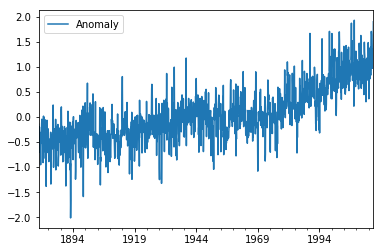

In [31]:
temp_anomaly.plot()

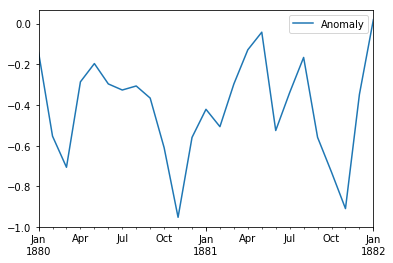

In [32]:
temp_anomaly[:25].plot()

We can customize our plot to prepare it for publication:

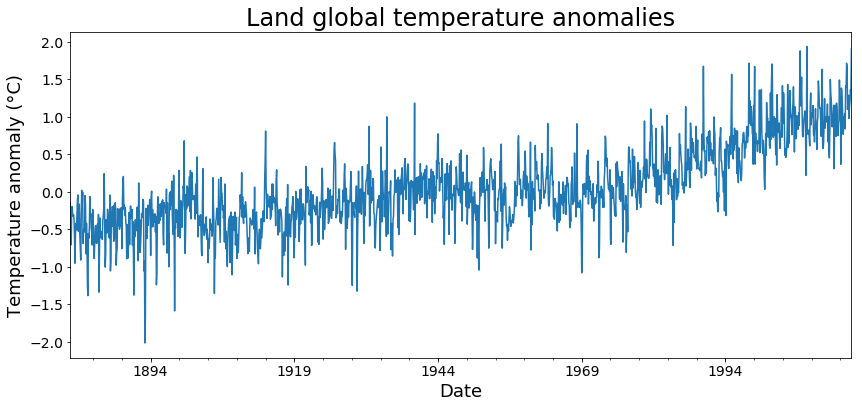

In [33]:
axes = temp_anomaly.plot(figsize=(14,6), legend=False, fontsize=14)
axes.set_title('Land global temperature anomalies', fontsize=24)
axes.set_ylabel('Temperature anomaly (°C)', fontsize=18)
axes.set_xlabel('Date', fontsize=18)

Pandas has very robust time series functionality, which is not surprising given its origins in the financial sector.

For example, we can use dates to slice the time series:

In [34]:
temp_anomaly['03/1990':'12/1991']

,Anomaly
1990-03-31,1.6709
1990-04-30,0.7764
1990-05-31,0.5339
1990-06-30,0.5496
1990-07-31,0.2152
1990-08-31,0.3198
1990-09-30,0.2478
1990-10-31,0.5314
1990-11-30,0.7287
1990-12-31,0.6508


If we wish to **smooth** our data, we can resample it, taking the mean over some regular interval, for example half of a year:

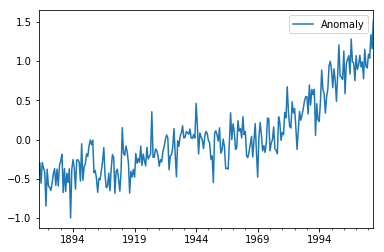

In [35]:
temp_anomaly.resample('2Q').mean().plot()

We can also perform rolling-window calculations, such as a rolling average:

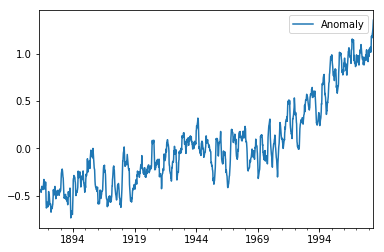

In [36]:
temp_anomaly.rolling(12).mean().plot()

## scikit-learn

The scikit-learn package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack, and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

Here we will use the `linear_model` module to perform a regression analysis on the data.

In [37]:
from sklearn import linear_model

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: 

* **estimator** interface for building and ﬁtting models
* **predictor** interface for making predictions
* **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

In [38]:
x_grid = np.arange(temp_anomaly.shape[0])
regmod = linear_model.LinearRegression()
regmod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

For a given scikit-learn **estimator** object named `model`, several methods are available. Irrespective of the type of **estimator**, there will be a `fit` method:

- `model.fit` : fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

In [39]:
regmod.fit(X=x_grid.reshape(-1,1), y=temp_anomaly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

**supervised estimators** are expected to have the following methods:

- `model.predict` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
- `model.predict_proba` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
- `model.score` : for classification or regression problems, all estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

In [40]:
prediction = regmod.predict(x_grid.reshape(-1,1))
prediction

array([[-0.66002704],
       [-0.65916443],
       [-0.65830182],
       ..., 
       [ 0.74516003],
       [ 0.74602264],
       [ 0.74688525]])

The `score` method for `LinearRegession` returns the coefficient of determination ($R^2$) value, which for this model fit to our time series is not very good:

In [41]:
regmod.score(X=x_grid.reshape(-1,1), y=temp_anomaly)

0.56517856743792638

In [42]:
prediction = pd.Series(prediction.flatten(), index=temp_anomaly.index)

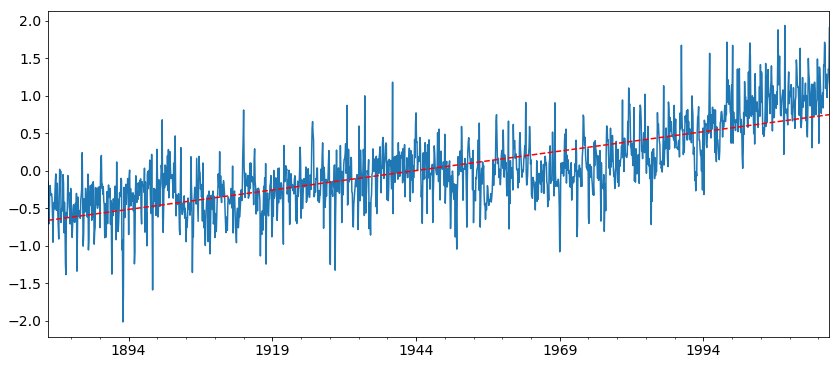

In [43]:
axes = temp_anomaly.plot(figsize=(14,6), legend=False, fontsize=14)
prediction.plot(ax=axes, style='--', color='red')

The linear model is clearly a poor fit. Perhaps we can fit a slightly more sophisticated model that allows for different slopes in different regions of the time series, which would allow us to represent accelerated warming that appears later in the time series.

For this, we will adopt a **Bayesian** statistical modeling approach.

Bayesian inference is an alternative statistical paradigm, where unknown quantities (parameters) are assigned probability distributions describing our previous knowledge about their underlying values, and this knowledge is updated with observed data, via *Bayes' formula*:

$$Pr(\theta|y) = \frac{Pr(y|\theta) Pr(\theta)}{Pr(y)}$$

where $Pr(\theta)$ is called the **prior distribution** of $\theta$ and $Pr(\theta|y)$ the corresponding **posterior distrubution** (*i.e.* after data are observed).


## PyMC3

Probabilistic programming (PP) allows flexible specification of Bayesian statistical models in code. PyMC3 is a new, open-source PP framework with an intuitive and readable, yet powerful, syntax that is close to the natural syntax statisticians use to describe models. It features next-generation Markov chain Monte Carlo (MCMC) sampling algorithms such as the No-U-Turn Sampler, a self-tuning variant of Hamiltonian Monte Carlo. This class of samplers works well on high dimensional and complex posterior distributions and allows many complex models to be fit without specialized knowledge about fitting algorithms. HMC and NUTS take advantage of gradient information from the likelihood to achieve much faster convergence than traditional sampling methods, especially for larger models. 

PyMC3's feature set helps to make Bayesian analysis as painless as possible. Here is a short list of some of its features:

-   Fits Bayesian statistical models with Markov chain Monte Carlo, variational inference and
    other algorithms.
-   Includes a large suite of well-documented statistical distributions.
-   Creates summaries including tables and plots.
-   Several convergence diagnostics and model checking methods are available.
-   Extensible: easily incorporates custom step methods and unusual probability distributions.

PyMC3 uses Theano as its computational engine, which allows for the fast calculation of mathematical expressions, as well as automatic differentiation.

In [44]:
import pymc3 as pm
from theano import shared

We will use PyMC3 to fit a **piecewise-linear** regression model to the data.

The model is specified mathematically as follows:

*Priors*

$$\begin{aligned}
b &\sim \text{Normal}(0, 100) \\
m_{early} &\sim \text{Normal}(0, 100) \\
m_{late} &\sim \text{Normal}(0, 100) \\
\sigma &\sim \text{Uniform}(0, 100) \\
\tau &\sim \text{DiscreteUniform}(0, 1632)
\end{aligned}$$

*Transformed parameters*

$$\begin{aligned}  
\mu_t = \begin{cases} 
m + b_{early}(x - \tau) & \text{if } t \lt \tau \\
m + b_{late}(x - \tau) & \text{if } t \ge \tau
\end{cases}
\end{aligned}$$

*Likelihood*

$$y \sim \text{Normal}(\mu_t, \sigma)$$

In [45]:
with pm.Model() as model:
    
    # Data
    x = shared(x_grid)
    y = shared(temp_anomaly.Anomaly.values)
    
    # Prior distributions
    intercept = pm.Normal('intercept', mu=0, sd=100)
    early_slope = pm.Normal('early_slope', mu=0, sd=100)
    late_slope = pm.Normal('late_slope', mu=0, sd=100)
    σ = pm.Uniform('σ', 0, 100)
    
    # Switchpoint
    τ = pm.DiscreteUniform('τ', 0, x_grid.max())
    
    # Early and late phase means
    μ_early = intercept + (x[:τ] - τ)*early_slope
    μ_late = intercept + (x[τ:] - τ)*late_slope
    
    # Data likelihoods
    pm.Normal('early_likelihood', μ_early, sd=σ, observed=y[:τ])
    pm.Normal('late_likelihood', μ_late, sd=σ, observed=y[τ:])

Running the `sample` function assigns appropriate sampling algorithms to each variable, and runs a Markov chain Monte Carlo simulation:

In [46]:
with model:
    trace = pm.sample(10000)

Assigned NUTS to intercept
Assigned NUTS to early_slope
Assigned NUTS to late_slope
Assigned NUTS to σ_interval_
Assigned Metropolis to τ
100%|██████████| 10000/10000 [01:34<00:00, 106.27it/s]


The result is a **trace** of samples for each variable that is a numerical approximation to the true posterior distribution.

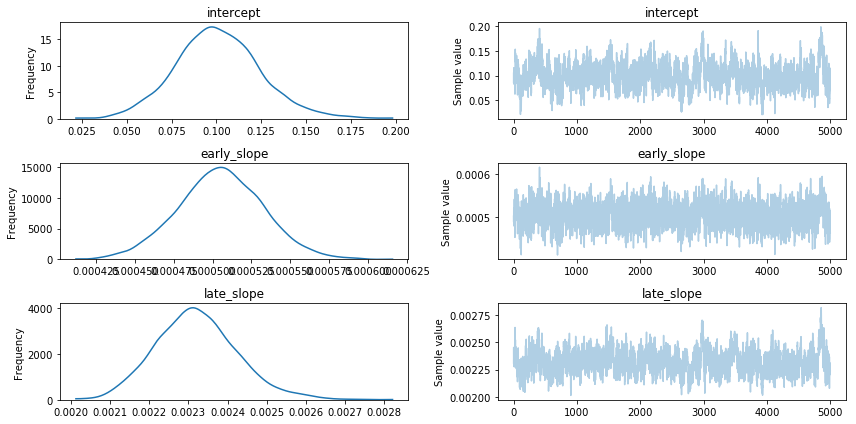

In [47]:
pm.traceplot(trace[5000:], varnames=['intercept', 'early_slope', 'late_slope']);

In [48]:
b = trace['intercept'].mean()
m1 = trace['early_slope'].mean()
m2 = trace['late_slope'].mean()
switch = int(trace['τ'].mean())

In [49]:
prediction = b + (x_grid-switch)*m1
prediction[switch:] = (b + (x_grid-switch)*m2)[switch:]
temp_anomaly['prediction'] = prediction

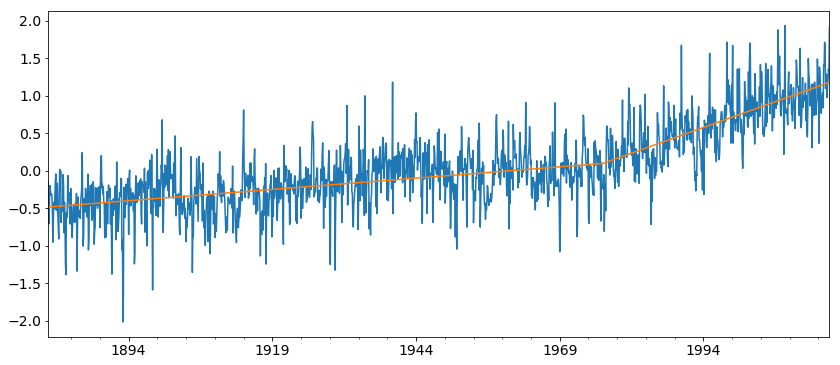

In [50]:
axes = temp_anomaly.plot(figsize=(14,6), legend=False, fontsize=14)
axes.plot(temp_anomaly.prediction)

## Gaussian process model

Gaussian Process regression is a non-parametric approach to regression or data fitting that assumes that observed data points $y$ are generated by some unknown latent function $f(x)$.  The latent function $f(x)$ is modeled as being multivariate normally distributed (a Gaussian Process), and is commonly denoted

\begin{equation}
f(x) \sim \mathcal{GP}(m(x;\theta), \, k(x, x';\theta)) \,.
\end{equation}

$m(x ; \theta)$ is the *mean function*, and $k(x, x' ;\theta)$ is the covariance function.  In many applications, the mean function is set to $0$ because the data can still be fit well using just covariances.  

$\theta$ is the set of *hyperparameters* for either the mean or covariance function.  These are the unknown variables.  They are usually found by maximizing the marginal likelihood.  This approach is much faster computationally than MCMC, but produces a point estimate, $\theta_{\mathrm{MAP}}$.  

In [51]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, DotProduct, ConstantKernel

`scikit-learn` offers a library of about a dozen covariance functions, which they call *kernels*, to choose from. A flexible choice to start with is the Mat&#232;rn covariance. 

$$k_{M}(x) = \frac{\sigma^2}{\Gamma(\nu)2^{\nu-1}} \left(\frac{\sqrt{2 \nu} x}{l}\right)^{\nu} K_{\nu}\left(\frac{\sqrt{2 \nu} x}{l}\right)$$

where where $\Gamma$ is the gamma function and $K$ is a modified Bessel function. The form of covariance matrices sampled from this function is governed by three parameters, each of which controls a property of the covariance.

* **amplitude** ($\sigma$) controls the scaling of the output along the y-axis. This parameter is just a scalar multiplier, and is therefore usually left out of implementations of the Mat&#232;rn function (*i.e.* set to one)

* **lengthscale** ($l$) complements the amplitude by scaling realizations on the x-axis. Larger values make points appear closer together.

* **roughness** ($\nu$) controls the sharpness of ridges in the covariance function, which ultimately affect the roughness (smoothness) of realizations.

Though in general all the parameters are non-negative real-valued, when $\nu = p + 1/2$ for integer-valued $p$, the function can be expressed partly as a polynomial function of order $p$ and generates realizations that are $p$-times differentiable, so values $\nu \in \{3/2, 5/2\}$ are extremely common.

A GP kernel can be specified as the sum of additive components in `scikit-learn` simply by using the sum operator, so we can include a Mat&#232;rn component (`Matern`), an amplitude factor (`ConstantKernel`), a linear trend (`DotProduct`), as well as an observation noise (`WhiteKernel`):

In [52]:
kernel = ConstantKernel() + DotProduct() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [53]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)

As mentioned, the `scikit-learn` API is very consistent across learning methods, and as a result, all functions expect a tabular set of input variables, either as a 2-dimensional NumPy `array` or a pandas `DataFrame`. Since we have only a single input variable here, we can add a second dimension using the `reshape` method:

In [54]:
X = x_grid.reshape(-1,1)
y = temp_anomaly.Anomaly.values

In [55]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + DotProduct(sigma_0=1) + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

Conveniently, `scikit-learn` displays the configuration that is used for the fitting algorithm each time one of its classes is instantiated. This is useful because it reveals hidden settings that are given default values if not specified by the user; these settings can often influence the resulting fit, so its important that we understand what `fit` has assumed on our behalf. Here, for example, we see that the L-BFGS-B algorithm has been used to optimized the hyperparameters (`optimizer='fmin_l_bfgs_b'`) and that the output variable has not been normalized (`normalize_y=False`). When there is a fear of finding a local, rather than a global, maximum in the marginal likelihood, a non-zero value can be specified for `n_restarts_optimizer`, which will run the optimization algorithm as many times as specified, using randomly-chosen starting coordinates, in the hope that a globally-competitive value can be discovered.

The `fit` method endows the returned model object with attributes associated with the fitting procedure; these attributes will all have an underscore (`_`) appended to their names. For example, the `kernel_` attribute will return the kernel used to parameterize the GP, along with their corresponding optimal hyperparameter values:

In [56]:
gp.kernel_

0.0131**2 + DotProduct(sigma_0=1e-05) + Matern(length_scale=119, nu=1.5) + WhiteKernel(noise_level=0.0895)

Along with the `fit` method, each supervised learning class retains a `predict` method that generates predicted outcomes ($y^*$) given a new set of predictors ($X^*$) distinct from those used to fit the model. For a Gaussian process, this is fulfulled by the *posterior predictive distribution*, which is the Gaussian process with the mean and covariance functions updated to their posterior forms, after having been fit. 

$$p(y^*|y, x, x^*) = \mathcal{GP}(m^*(x^*), k^*(x^*))$$

where the posterior mean and covariance functions are calculated as:

$$\begin{aligned}
m^*(x^*) &= k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}y \\
k^*(x^*) &= k(x^*,x^*)+\sigma^2 - k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}k(x^*,x)
\end{aligned}$$

In addition to comparing the prediction with observed data over the range of temperatures used to fit the model, we can try to predict beyond the range of the data, by appending several decades to the end of the `X` values:

In [57]:
X_pred = np.concatenate([X, np.arange(1632, 1732).reshape(-1,1)])

In [58]:
y_pred, sigma = gp.predict(X_pred, return_std=True)

/Users/frenchwr/anaconda/envs/data_analysis/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Notice that we can calculate a prediction for arbitrary inputs $X^*$. To get a sense of the form of the posterior over a range of likely inputs, we can pass it a linear space as we have done above. `predict` optionally returns posterior standard deviations along with the expected value, so we can use this to plot a confidence region around the expected function:

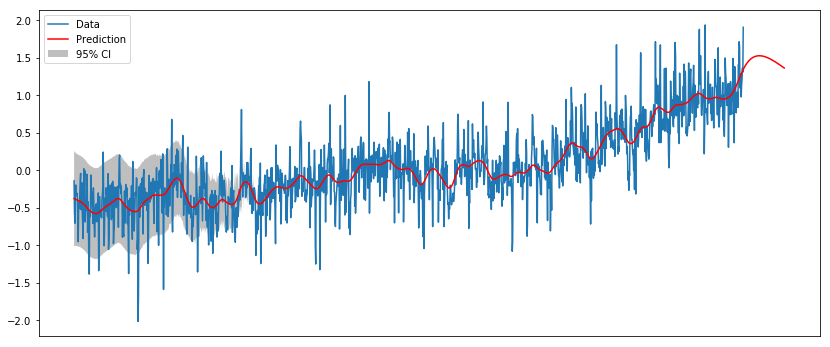

In [59]:
plt.figure(figsize=(14,6))
plt.plot(x_grid, temp_anomaly.Anomaly.values, label='Data')
plt.plot(X_pred.flatten(), y_pred, color='red', label='Prediction')
plt.fill(np.concatenate([X_pred.flatten(), X_pred.flatten()[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xticks([])
plt.legend(loc='upper left');

## References

This work was derived from [The Python Scientific Stack](https://barbagroup.github.io/essential_skills_RRC/jupyter/1/) by L.A. Barba, N.C. Clementi, G.F. Forsyth (2016).